In [59]:
!git clone https://github.com/armandoordonez/eda_couse.git


Cloning into 'eda_couse'...
remote: Enumerating objects: 692, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 692 (delta 176), reused 150 (delta 147), pack-reused 494
Receiving objects: 100% (692/692), 40.23 MiB | 9.16 MiB/s, done.
Resolving deltas: 100% (380/380), done.
Updating files: 100% (129/129), done.


# Importe de librerías

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del archivo CSV

In [ ]:
ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV
data = pd.read_csv(ruta_archivo)

# Análisis Exploratorio de Datos

In [ ]:
data.head()

,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
0,LP001002,Hombre,No,0,Graduado,No,5849,0.0,NaN,360.0,1.0,Urbano,Y
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
print(data.shape)

(614, 13)


In [ ]:
# cuenta de valores nulo
data.isnull().sum()

ID                          0
Genero                     13
Married                     3
dependientes               15
 educacion                  0
 autoempleado              32
 ingresos_solicitante       0
 ingresos_cosolicitante     0
 monto_prestamo            22
 plazo_prestamo            14
 historial_crediticio      50
 area_propiedad             0
 estado_prestamo            0
dtype: int64

In [ ]:
#eliminar datos nulos
data = data.dropna()

# Valores Únicos en las categóricas

In [ ]:
categoricas = ['Genero', 'Married', 'dependientes', ' educacion', " autoempleado", ' area_propiedad', ' estado_prestamo']

for variable in categoricas:
  print(f'Valores únicos para la variable {variable}')
  print(data[variable].unique())
  print('*'*20)

Valores únicos para la variable Genero
['Hombre' 'FeHombre']
********************
Valores únicos para la variable Married
['Si' 'No']
********************
Valores únicos para la variable dependientes
['1' '0' '2' '3+']
********************
Valores únicos para la variable  educacion
['Graduado' 'Not Graduado']
********************
Valores únicos para la variable  autoempleado
['No' 'Si']
********************
Valores únicos para la variable  area_propiedad
['Rural' 'Urbano' 'SemiUrbano']
********************
Valores únicos para la variable  estado_prestamo
['N' 'Y']
********************


# Reemplazar valores en variables

In [ ]:
# Reemplazo de valores y de tipo de variable
data['Genero'] = data['Genero'].replace({"Hombre": 1, "FeHombre": 0})
data['Genero'] = data['Genero'].astype(int)

data['Married'] = data['Married'].replace({"Si": 1, "No": 0})
data['Married'] = data['Married'].astype(int)

data[' educacion'] = data[' educacion'].replace({"Graduado": 1, "Not Graduado": 0})
data[' educacion'] = data[' educacion'].astype(int)

data[' autoempleado'] = data[' autoempleado'].replace({"Si": 1, "No": 0})
data[' autoempleado'] = data[' autoempleado'].astype(int)

data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

# Dividir el conjunto en X's y Y

In [ ]:
X = data[[" ingresos_solicitante", " ingresos_cosolicitante", " monto_prestamo", 'Married', ' educacion', 'Genero']]
y = data[' estado_prestamo']

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    ingresos_solicitante    480 non-null    int64  
 1    ingresos_cosolicitante  480 non-null    float64
 2    monto_prestamo          480 non-null    float64
 3   Married                  480 non-null    int64  
 4    educacion               480 non-null    int64  
 5   Genero                   480 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 26.2 KB
None


# Dividir el df en test y train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo

In [ ]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluación del Modelo

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
# Precisión del Modelo
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")


Precisión del modelo: 0.70


# Matriz de confusión

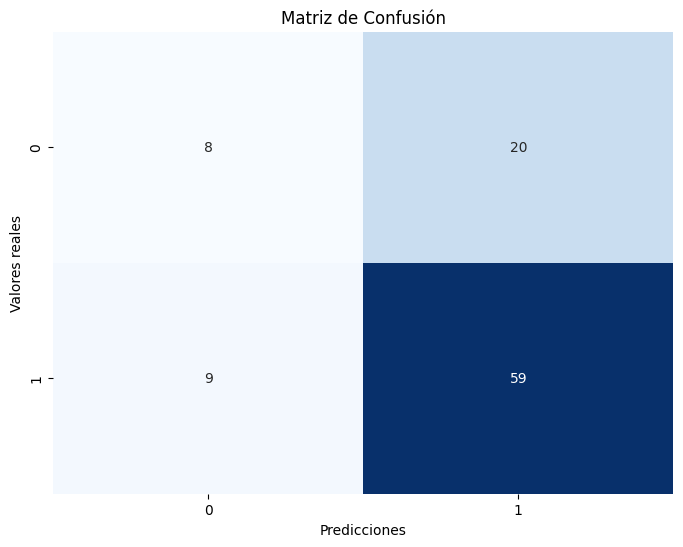

In [ ]:
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.47      0.29      0.36        28
           1       0.75      0.87      0.80        68

    accuracy                           0.70        96
   macro avg       0.61      0.58      0.58        96
weighted avg       0.67      0.70      0.67        96

